In [36]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import openpyxl

In [37]:
#df_train = pd.read_excel('C:/Users/d.savchenko/python/farma_pred/Med_2017-2019_20190719.xlsx') 
df_train = pd.read_excel('C:/Users/d.savchenko/python/farma_pred/Med_2017-2019_20190719.xlsx') 
df_test = pd.read_excel('C:/Users/d.savchenko/python/farma_pred/test.xlsx')

In [38]:
df_train.head()

,Brand,Year,Week,Digital Video,Digital Not Video,Sales,GRP,WGRP,EqGRP
0,ACC,2017,1,0,0,74758.08,407.41,339.23,387.03
1,ACC,2017,2,0,0,53438.91,212.02,136.90,171.69
2,ACC,2017,3,0,0,38183.04,238.36,119.05,166.85
3,ACC,2017,4,0,0,32693.15,246.07,122.83,172.25
4,ACC,2017,5,0,0,34475.24,282.32,235.15,268.22


In [39]:
df_train.fillna(0, inplace=True)

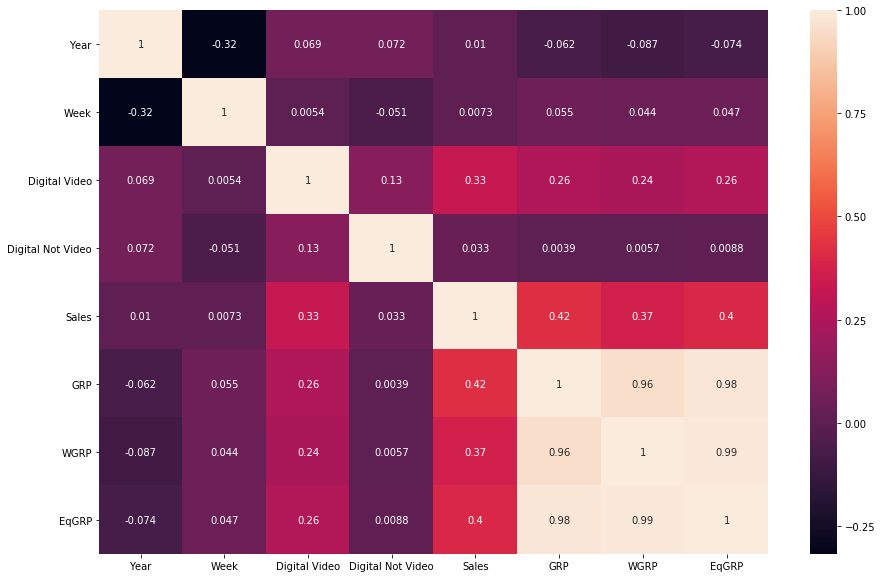

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [76]:
print(df_train.groupby(df_train["Brand"])).mean()
#data.groupby(data['date'])

KeyError: 'Brand'

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
sns.boxplot(df_train["Brand"], df_train["Sales"]);

In [ ]:
#for dataset in [df_train, df_test]:
 ##   dataset = pd.concat([dataset, pd.get_dummies(dataset['Brand'],prefix="Brand")], axis=1)
 #   dataset.drop(['Brand'], axis=1, inplace=True)
    

In [ ]:
df_train.head()

In [ ]:
""" 

to_delete = []
brandlast = df_train["Brand"][1]
for i in range(df_train.shape[0]):
    brandcurrent = df_train["Brand"][i]
    print(brandlast)
    print(i)
    print(df_train["Brand"][i])
    
    if i > 0:
        brandlast = df_train["Brand"][i-1]
        
    if brandcurrent == brandlast:
        df_train["Sales"][i-1] = df_train["Sales"][i]
    else:
        #df_train = df_train.drop(i)
        print("удалил")
        to_delete.append(i)
df_train.to_excel('C:/Users/d.savchenko/python/farma_pred/NEW_DF.xlsx')

print(to_delete)
"""

In [ ]:
#df_train = pd.concat([df_train, pd.get_dummies(df_train['Brand'],prefix="Brand")], axis=1)
#df_train.drop(['Brand', 'Year', 'Week', 'WGRP', 'EqGRP'], axis=1, inplace=True)

#df_test = pd.concat([df_test, pd.get_dummies(df_test['Brand'],prefix="Brand")], axis=1)
#df_test.drop(['Brand', 'Year', 'Week', 'WGRP', 'EqGRP'], axis=1, inplace=True)

In [ ]:
#df_train['GRP0'] = df_train['GRP'].map(lambda hh: 1 if hh < 1 else 0)

#df_test['GRP0'] = df_test['GRP'].map(lambda hh: 1 if hh <1 else 0)



In [ ]:
df_brands = df_train["Brand"]


In [ ]:
df_brands = df_brands.drop_duplicates()
#print(brands)
for i in df_brands:
    print (i)
    

In [ ]:
for i in df_brands:
    print(i)
    #df_brands["mean"]=df_train[df_train["Brand"] == i]["Sales"].mean()
    print(df_train[df_train["Brand"] == i]["Sales"].mean())
    #df_train["group1"] = df_train[df_train["Brand"] == i]["Sales"].mean().map(lambda hh: 1 if hh < 1000 else 0)

In [ ]:
#df_train.drop(df_train.groupby('Brand')['Sales'].mean() < 2000)

df_train.groupby('Brand')['Sales'].mean() < 2000

In [ ]:
train_df['SibSp0'] = train_df['SibSp'].map(lambda hh: 1 if hh == 0 else 0)
train_df['SibSp1-2'] = train_df['SibSp'].map(lambda hh: 1 if hh in [1, 2] else 0)
train_df['SibSp3+'] = train_df['SibSp'].map(lambda hh: 1 if hh > 2 else 0)

In [ ]:
print(df_train["group1"])

In [56]:

df_train = pd.concat([df_train, pd.get_dummies(df_train['Brand'],prefix="Brand")], axis=1)
df_train.drop(['Brand' ], axis=1, inplace=True)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Week'],prefix="Week")], axis=1)
df_train.drop(['Week' ], axis=1, inplace=True)


df_test = pd.concat([df_test, pd.get_dummies(df_test['Brand'],prefix="Brand")], axis=1)
df_test.drop(['Brand' ], axis=1, inplace=True)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Week'],prefix="Week")], axis=1)
df_test.drop(['Week' ], axis=1, inplace=True)

In [42]:
df_train.head()

,Brand,Year,Week,Digital Video,Digital Not Video,Sales,GRP,WGRP,EqGRP
0,ACC,2017,1,0,0,74758.08,407.41,339.23,387.03
1,ACC,2017,2,0,0,53438.91,212.02,136.90,171.69
2,ACC,2017,3,0,0,38183.04,238.36,119.05,166.85
3,ACC,2017,4,0,0,32693.15,246.07,122.83,172.25
4,ACC,2017,5,0,0,34475.24,282.32,235.15,268.22


In [43]:
df_test.head()

,Brand,Year,Week,Digital Video,Digital Not Video,GRP,WGRP,EqGRP
0,Nurofen,2019,18,0,0,129.04,64.54,90.33
1,Nurofen,2019,19,0,0,233.11,90.95,132.56
2,Nurofen,2019,20,0,0,91.63,45.81,64.12
3,Nurofen,2019,21,0,0,267.74,104.92,152.73
4,Nurofen,2019,22,0,0,106.08,52.96,74.35


In [44]:
#Преобразования для полного рынка

In [61]:
X = df_train.drop(['Sales'], axis=1)
y = df_train['Sales']

In [62]:
X.shape, y.shape

((6277, 112), (6277,))

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=17)

In [64]:
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape


((1884, 112), (4393, 112), (1884,), (4393,))

In [65]:
X_valid


,Year,Digital Video,Digital Not Video,GRP,WGRP,EqGRP,Brand_ACC,Brand_ACIDOLAC,Brand_ALLERWAY,Brand_APIMILK,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
4606,2017,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6223,2018,0,0,269.50,240.36,252.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6003,2018,0,0,224.68,149.78,202.21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2750,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72,2018,0,0,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2451,2017,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
121,2017,0,1464,0.00,0.00,0.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
892,2017,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_test.shape

(27, 18)

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
first_xgboost = GradientBoostingRegressor(random_state=17, criterion= 'friedman_mse')
xgboost_params = {'learning_rate': [0.1, 0.05, 0.01], 'loss' :['lad'], 'min_samples_leaf': [1],  'max_depth': [2, 3, 4, 5, 7],
                  'n_estimators': [50, 80, 90, 100, 300, 500]}

In [68]:
xgboost_grid = GridSearchCV(first_xgboost, xgboost_params, cv=7, n_jobs=-1)

,Year,Digital Video,Digital Not Video,GRP,WGRP,EqGRP,Brand_ACC,Brand_ACIDOLAC,Brand_ALLERWAY,Brand_APIMILK,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
5159,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,2018,0,0,136.78,136.75,136.78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2499,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1701,2017,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2924,2017,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4438,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4314,2018,5623,386469,183.64,122.42,165.29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3319,2018,0,416735,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2489,2018,0,0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
%%time
xgboost_grid.fit(X_train, y_train)

Wall time: 6min 12s


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=17, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.05, 0.01], 'loss': ['lad'], 'min_samples_leaf': [1], 'max_depth': [2, 3, 4, 5, 7], 'n_estimators': [50, 80, 90, 100, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
xgboost_grid.best_score_, xgboost_grid.best_params_

(0.9667047813224448,
 {'learning_rate': 0.1,
  'loss': 'lad',
  'max_depth': 7,
  'min_samples_leaf': 1,
  'n_estimators': 500})

In [72]:
xgboost_valid_pred = xgboost_grid.predict(X_valid)

In [73]:
print(xgboost_valid_pred)


[ 5085.47706847 14621.99835004 19321.80512585 ...  2120.25727382
 15154.94313868  4965.46855565]


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 

(mean_squared_error(y_valid, xgboost_valid_pred))**0.5


4513.735260361693

In [75]:
((abs(y_valid - xgboost_valid_pred)/xgboost_valid_pred)*100).mean()

17.48668799948215

In [ ]:
#xgboost_valid_pred = xgboost_grid.predict(df_test)

In [ ]:
#print(xgboost_valid_pred)

In [ ]:
#for i in xgboost_valid_pred:
 #   print (i)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)



In [ ]:
df_brands
    

In [ ]:
lm_valid_pred = lm.predict(X_valid)

In [ ]:
(mean_squared_error(y_valid, lm_valid_pred))**0.5

In [ ]:
((abs(y_valid - lm_valid_pred)/y_valid)).mean()

In [ ]:
#lm_valid_pred = lm.predict(df_test)

In [ ]:
#print(lm_valid_pred)

In [ ]:
EN = ElasticNet(alpha=0.0000001, positive=True, normalize=False)
EN.fit(X_train, y_train)
print(EN.intercept_)
print(EN.coef_)



In [ ]:
df_res = pd.read_excel('C:/Users/d.savchenko/Desktop/базы для предсказаний фарма/TV+Digital_Med_2017-2019_20190610.xlsx')

In [ ]:
"""

wb = openpyxl.load_workbook('C:/Users/d.savchenko/Desktop/базы для предсказаний фарма/TV+Digital_Med_2017-2019_20190610.xlsx')
ws = wb.active

j = 1 

df_brands=df_brands.drop_duplicates(keep=False)
#brands.drop_duplicates


colnum = 10
d = ws.cell(row=2, column=colnum, value=EN.intercept_)
d = ws.cell(row=1, column=colnum, value='b')
for i in range(len(EN.coef_)):
    #d = ws.cell(row=1, column=colnum+j, value=lm.coef_[i])
    d = ws.cell(row=2, column=colnum+j, value=EN.coef_[i])
    j = j + 1

wb.save('C:/Users/d.savchenko/Desktop/базы для предсказаний фарма/TV+Digital_Med_KOEF.xlsx')
wb.close()

"""

In [ ]:
EN_valid_pred = EN.predict(X_valid)
((abs(y_valid - EN_valid_pred)/y_valid)*100).mean()

In [ ]:
(mean_squared_error(y_valid, EN_valid_pred))**0.5

In [ ]:
#EN_valid_pred = EN.predict(df_test)
#print(EN_valid_pred)